In [1]:
import pandas as pd
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import cm
from scipy import stats
from scipy.stats import pearsonr
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.ticker import FormatStrFormatter

plt.rcParams.update({'font.family':'arial'})

%matplotlib inline

# ABE9

In [2]:
df_c = pd.read_csv('Data/cumulative/ABE8e_ABE9_A115.csv')
df_c = df_c / 100

df_c_sem = pd.read_csv('Data/cumulative/ABE8e_ABE9_A115_sem.csv')
df_c_sem = df_c_sem / 100

In [3]:
df_allele1 = df_c[['A5','A8']]
df_allele1['probability'] = df_allele1['A5'] * df_allele1['A8']
df_allele1.to_csv('Data/calc_freq/ABE8e_ABE9_A5_A8.csv',index=False)

df_allele1_err = df_c_sem[['A5','A8']]
df_allele1_err['probability'] = np.sqrt(np.square(df_allele1_err['A5']/df_allele1['A5']) + 
                                        np.square(df_allele1_err['A8']/df_allele1['A8'])) * df_allele1['probability']
df_allele1_err.to_csv('Data/calc_freq/ABE8e_ABE9_A5_A8_err.csv',index=False)

/var/folders/zt/rj0vk4w576n5lb6vjzgpk8nc0000gn/T/ipykernel_15777/3283029841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele1['probability'] = df_allele1['A5'] * df_allele1['A8']
/var/folders/zt/rj0vk4w576n5lb6vjzgpk8nc0000gn/T/ipykernel_15777/3283029841.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele1_err['probability'] = np.sqrt(np.square(df_allele1_err['A5']/df_allele1['A5']) +


In [4]:
df_a = pd.read_csv('Data/allele_merged/20211109_ABE8e_ABE9_A115.csv',
                   usecols=['target','24h_mean','12h_mean','8h_mean','4h_mean',
                            '2h_mean','1h_mean','0h_mean'])

df_a = df_a.set_index('target')
df_a = df_a.fillna(0)
df_a = df_a[df_a.columns[::-1]]
df_a = df_a / 100

df_a.head()

,0h_mean,1h_mean,2h_mean,4h_mean,8h_mean,12h_mean,24h_mean
target,,,,,,,
GAAGACCAAGGATAGACTGC,0.937330,0.940429,0.931711,0.918281,0.902160,0.886276,0.873972
GAAGGCCAAGGATAGACTGC,0.003600,0.004052,0.010129,0.017159,0.023222,0.026273,0.027836
GAAGGCCGAGGATAGACTGC,0.000000,0.000000,0.000000,0.003742,0.010589,0.015496,0.020889
GGAGACCAAGGATAGACTGC,0.003143,0.003168,0.003131,0.003443,0.002950,0.003311,0.003231
GAAGACCGAGGATAGACTGC,0.001986,0.001989,0.002201,0.002555,0.002412,0.002908,0.002767


In [5]:
df_a_err = pd.read_csv('Data/allele_merged/20211109_ABE8e_ABE9_A115.csv',
                       usecols=['target','24h_SEM','12h_SEM','8h_SEM','4h_SEM',
                                '2h_SEM','1h_SEM','0h_SEM'])

df_a_err = df_a_err.set_index('target')
df_a_err = df_a_err.fillna(0)
df_a_err = df_a_err[df_a_err.columns[::-1]]
df_a_err = df_a_err / 100

df_a_err.head()

,0h_SEM,1h_SEM,2h_SEM,4h_SEM,8h_SEM,12h_SEM,24h_SEM
target,,,,,,,
GAAGACCAAGGATAGACTGC,0.001005,0.000993,0.003603,0.004009,0.000487,0.004999,0.006424
GAAGGCCAAGGATAGACTGC,0.000034,0.000162,0.000560,0.000479,0.000747,0.000296,0.002042
GAAGGCCGAGGATAGACTGC,0.000000,0.000000,0.000000,0.000140,0.000508,0.000452,0.002460
GGAGACCAAGGATAGACTGC,0.000037,0.000069,0.000219,0.000437,0.000067,0.000388,0.000068
GAAGACCGAGGATAGACTGC,0.000054,0.000045,0.000249,0.000406,0.000149,0.000285,0.000229


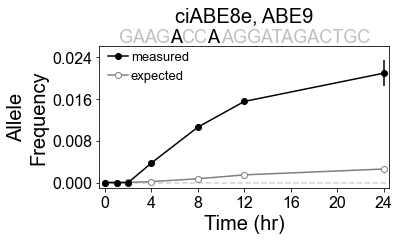

In [6]:
fig,ax = plt.subplots(figsize=(5.2,2.6))

time = [0,1,2,4,8,12,24]

ax.axhline(0,-0.5,24.5,color='lightgrey',linestyle='--')

ax.errorbar(time,df_allele1['probability'],yerr=df_allele1_err['probability'],
            fmt='-o',mfc='white',color='grey',label='calculated')
ax.errorbar(time,df_a.loc['GAAGGCCGAGGATAGACTGC'],yerr=df_a_err.loc['GAAGGCCGAGGATAGACTGC'],
            marker='o',color='black',label='measured')

ax.set_xlim([-0.5,24.5])
ax.set_xticks([0,4,8,12,16,20,24])
ax.tick_params(axis="x", labelsize=16)
ax.set_xlabel('Time (hr)', fontsize=20)

ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.set_ylim([-0.001,0.026])
ax.set_yticks([0,0.008,0.016,0.024])
ax.tick_params(axis="y", labelsize=16)
ax.set_ylabel('Allele\nFrequency',fontsize=20)

legend_elements = [Line2D([0],[0],marker='o',color='black',label='measured',
                          markerfacecolor='black',markersize=6,linestyle='-'),
                   Line2D([0],[0],marker='o',color='grey',label='expected',
                          markerfacecolor='white',markersize=6,linestyle='-')]
ax.legend(handles=legend_elements,bbox_to_anchor=(0.35,1.05),
          fontsize=13,frameon=False,handlelength=1.6,handletextpad=0.2)

ax.text(2.3, 0.026, 'GA', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(3.9, 0.026, 'A', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(5, 0.026, 'G', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(6.1, 0.026, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(7.7, 0.026, 'CC', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(9.3, 0.026, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(16.4, 0.026, 'AGGATAGACTGC', ha='center', va='bottom',color='silver',fontsize=18)

ax.set_title('ciABE8e, ABE9',fontsize=20,pad=25)

plt.savefig('ExportedPlots/ABE8e_ABE9_allele1_20220405.svg',dpi=300,bbox_inches='tight')

# ABE16

In [7]:
df_c = pd.read_csv('Data/cumulative/ABE8e_ABE16_A115.csv')
df_c = df_c / 100

df_c_sem = pd.read_csv('Data/cumulative/ABE8e_ABE16_A115_sem.csv')
df_c_sem = df_c_sem / 100

In [8]:
df_allele2 = df_c[['A4','A5','A7','A8']]
df_allele2['probability'] = df_allele2['A4'] * df_allele2['A5'] * df_allele2['A7'] * df_allele2['A8']
df_allele2.to_csv('Data/calc_freq/ABE8e_ABE16_A4_A5_A7_A8.csv',index=False)

df_allele2_err = df_c_sem[['A4','A5','A7','A8']]
df_allele2_err['probability'] = np.sqrt(np.square(df_allele2_err['A4']/df_allele2['A4']) + 
                                        np.square(df_allele2_err['A5']/df_allele2['A5']) +
                                        np.square(df_allele2_err['A7']/df_allele2['A7']) +
                                        np.square(df_allele2_err['A8']/df_allele2['A8'])) * df_allele2['probability']
df_allele2_err.to_csv('Data/calc_freq/ABE8e_ABE16_A4_A5_A7_A8_err.csv',index=False)

/var/folders/zt/rj0vk4w576n5lb6vjzgpk8nc0000gn/T/ipykernel_15777/2327639335.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele2['probability'] = df_allele2['A4'] * df_allele2['A5'] * df_allele2['A7'] * df_allele2['A8']
/var/folders/zt/rj0vk4w576n5lb6vjzgpk8nc0000gn/T/ipykernel_15777/2327639335.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele2_err['probability'] = np.sqrt(np.square(df_allele2_err['A4']/df_allele2['A4']) +


In [9]:
df_allele3 = df_c[['A4','A5','A7','A12']]
df_allele3['probability'] = df_allele3['A4'] * df_allele3['A5'] * df_allele3['A7'] * df_allele3['A12']
df_allele3.to_csv('Data/calc_freq/ABE8e_ABE16_A4_A5_A7_A12.csv',index=False)

df_allele3_err = df_c_sem[['A4','A5','A7','A12']]
df_allele3_err['probability'] = np.sqrt(np.square(df_allele3_err['A4']/df_allele3['A4']) + 
                                        np.square(df_allele3_err['A5']/df_allele3['A5']) +
                                        np.square(df_allele3_err['A7']/df_allele3['A7']) +
                                        np.square(df_allele3_err['A12']/df_allele3['A12'])) * df_allele3['probability']
df_allele3_err.to_csv('Data/calc_freq/ABE8e_ABE16_A4_A5_A7_A12_err.csv',index=False)

/var/folders/zt/rj0vk4w576n5lb6vjzgpk8nc0000gn/T/ipykernel_15777/2702448283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele3['probability'] = df_allele3['A4'] * df_allele3['A5'] * df_allele3['A7'] * df_allele3['A12']
/var/folders/zt/rj0vk4w576n5lb6vjzgpk8nc0000gn/T/ipykernel_15777/2702448283.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele3_err['probability'] = np.sqrt(np.square(df_allele3_err['A4']/df_allele3['A4']) +


In [10]:
df_allele4 = df_c[['A4','A5','A7','A8','A12']]
df_allele4['probability'] = df_allele4['A4']*df_allele4['A5']*df_allele4['A7']*df_allele4['A8']*df_allele4['A12']
df_allele4.to_csv('Data/calc_freq/ABE8e_ABE16_A4_A5_A7_A8_A12.csv',index=False)

df_allele4_err = df_c_sem[['A4','A5','A7','A8','A12']]
df_allele4_err['probability'] = np.sqrt(np.square(df_allele4_err['A4']/df_allele4['A4']) + 
                                        np.square(df_allele4_err['A5']/df_allele4['A5']) +
                                        np.square(df_allele4_err['A7']/df_allele4['A7']) +
                                        np.square(df_allele4_err['A8']/df_allele4['A8']) +
                                        np.square(df_allele4_err['A12']/df_allele4['A12'])) * df_allele4['probability']
df_allele4_err.to_csv('Data/calc_freq/ABE8e_ABE16_A4_A5_A7_A8_A12_err.csv',index=False)

/var/folders/zt/rj0vk4w576n5lb6vjzgpk8nc0000gn/T/ipykernel_15777/1316382951.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele4['probability'] = df_allele4['A4']*df_allele4['A5']*df_allele4['A7']*df_allele4['A8']*df_allele4['A12']
/var/folders/zt/rj0vk4w576n5lb6vjzgpk8nc0000gn/T/ipykernel_15777/1316382951.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele4_err['probability'] = np.sqrt(np.square(df_allele4_err['A4']/df_allele4['A4']) +


In [11]:
df_allele5 = df_c[['A4','A5','A7','A8','A9']]
df_allele5['probability'] = df_allele5['A4']*df_allele5['A5']*df_allele5['A7']*df_allele5['A8']*df_allele5['A9']
df_allele5.to_csv('Data/calc_freq/ABE8e_ABE16_A4_A5_A7_A8_A9.csv',index=False)

df_allele5_err = df_c_sem[['A4','A5','A7','A8','A9']]
df_allele5_err['probability'] = np.sqrt(np.square(df_allele5_err['A4']/df_allele5['A4']) + 
                                        np.square(df_allele5_err['A5']/df_allele5['A5']) +
                                        np.square(df_allele5_err['A7']/df_allele5['A7']) +
                                        np.square(df_allele5_err['A8']/df_allele5['A8']) +
                                        np.square(df_allele5_err['A9']/df_allele5['A9'])) * df_allele5['probability']
df_allele5_err.to_csv('Data/calc_freq/ABE8e_ABE16_A4_A5_A7_A8_A9_err.csv',index=False)

/var/folders/zt/rj0vk4w576n5lb6vjzgpk8nc0000gn/T/ipykernel_15777/2884854480.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele5['probability'] = df_allele5['A4']*df_allele5['A5']*df_allele5['A7']*df_allele5['A8']*df_allele5['A9']
/var/folders/zt/rj0vk4w576n5lb6vjzgpk8nc0000gn/T/ipykernel_15777/2884854480.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele5_err['probability'] = np.sqrt(np.square(df_allele5_err['A4']/df_allele5['A4']) +


In [12]:
df_allele6 = df_c[['A4','A5','A7','A8','A9','A12']]
df_allele6['probability'] = df_allele6['A4']*df_allele6['A5']*df_allele6['A7']*df_allele6['A8']*df_allele6['A9']*df_allele6['A12']
df_allele6.to_csv('Data/calc_freq/ABE8e_ABE16_A4_A5_A7_A8_A9_A12.csv',index=False)

df_allele6_err = df_c_sem[['A4','A5','A7','A8','A9','A12']]
df_allele6_err['probability'] = np.sqrt(np.square(df_allele6_err['A4']/df_allele6['A4']) + 
                                        np.square(df_allele6_err['A5']/df_allele6['A5']) +
                                        np.square(df_allele6_err['A7']/df_allele6['A7']) +
                                        np.square(df_allele6_err['A8']/df_allele6['A8']) +
                                        np.square(df_allele6_err['A9']/df_allele6['A9']) +
                                        np.square(df_allele6_err['A12']/df_allele6['A12'])) * df_allele6['probability']
df_allele6_err.to_csv('Data/calc_freq/ABE8e_ABE16_A4_A5_A7_A8_A9_A12_err.csv',index=False)

/var/folders/zt/rj0vk4w576n5lb6vjzgpk8nc0000gn/T/ipykernel_15777/1826048790.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele6['probability'] = df_allele6['A4']*df_allele6['A5']*df_allele6['A7']*df_allele6['A8']*df_allele6['A9']*df_allele6['A12']
/var/folders/zt/rj0vk4w576n5lb6vjzgpk8nc0000gn/T/ipykernel_15777/1826048790.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele6_err['probability'] = np.sqrt(np.square(df_allele6_err['A4']/df_allele6['A4']) +


In [13]:
df_allele7 = df_c[['A4','A5','A7','A9']]
df_allele7['probability'] = df_allele7['A4'] * df_allele7['A5'] * df_allele7['A7'] * df_allele7['A9']
df_allele7.to_csv('Data/calc_freq/ABE8e_ABE16_A4_A5_A7_A9.csv',index=False)

df_allele7_err = df_c_sem[['A4','A5','A7','A9']]
df_allele7_err['probability'] = np.sqrt(np.square(df_allele7_err['A4']/df_allele7['A4']) + 
                                        np.square(df_allele7_err['A5']/df_allele7['A5']) +
                                        np.square(df_allele7_err['A7']/df_allele7['A7']) +
                                        np.square(df_allele7_err['A9']/df_allele7['A9'])) * df_allele7['probability']
df_allele7_err.to_csv('Data/calc_freq/ABE8e_ABE16_A4_A5_A7_A9_err.csv',index=False)

/var/folders/zt/rj0vk4w576n5lb6vjzgpk8nc0000gn/T/ipykernel_15777/2034869932.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele7['probability'] = df_allele7['A4'] * df_allele7['A5'] * df_allele7['A7'] * df_allele7['A9']
/var/folders/zt/rj0vk4w576n5lb6vjzgpk8nc0000gn/T/ipykernel_15777/2034869932.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele7_err['probability'] = np.sqrt(np.square(df_allele7_err['A4']/df_allele7['A4']) +


In [14]:
df_allele8 = df_c[['A4','A5','A7','A14']]
df_allele8['probability'] = df_allele8['A4'] * df_allele8['A5'] * df_allele8['A7'] * df_allele8['A14']
df_allele8.to_csv('Data/calc_freq/ABE8e_ABE16_A4_A5_A7_A14.csv',index=False)

df_allele8_err = df_c_sem[['A4','A5','A7','A14']]
df_allele8_err['probability'] = np.sqrt(np.square(df_allele8_err['A4']/df_allele8['A4']) + 
                                        np.square(df_allele8_err['A5']/df_allele8['A5']) +
                                        np.square(df_allele8_err['A7']/df_allele8['A7']) +
                                        np.square(df_allele8_err['A14']/df_allele8['A14'])) * df_allele8['probability']
df_allele8_err.to_csv('Data/calc_freq/ABE8e_ABE16_A4_A5_A7_A14_err.csv',index=False)

/var/folders/zt/rj0vk4w576n5lb6vjzgpk8nc0000gn/T/ipykernel_15777/1261398513.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele8['probability'] = df_allele8['A4'] * df_allele8['A5'] * df_allele8['A7'] * df_allele8['A14']
/var/folders/zt/rj0vk4w576n5lb6vjzgpk8nc0000gn/T/ipykernel_15777/1261398513.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele8_err['probability'] = np.sqrt(np.square(df_allele8_err['A4']/df_allele8['A4']) +


In [15]:
df_a = pd.read_csv('Data/allele_merged/20211109_ABE8e_ABE16_A115.csv',
                   usecols=['target','24h_mean','12h_mean','8h_mean','4h_mean',
                            '2h_mean','1h_mean','0h_mean'])

df_a = df_a.set_index('target')
df_a = df_a.fillna(0)
df_a = df_a[df_a.columns[::-1]]
df_a = df_a / 100

df_a.head()

,0h_mean,1h_mean,2h_mean,4h_mean,8h_mean,12h_mean,24h_mean
target,,,,,,,
GGGAATAAATCATAGAATCC,0.933183,0.932138,0.922144,0.908913,0.867935,0.800649,0.748839
GGGGGTGAATCATAGAATCC,0.006594,0.007189,0.009207,0.020029,0.044630,0.057642,0.084975
GGGGGTGGATCATAGAATCC,0.000000,0.000000,0.001148,0.001937,0.008606,0.015302,0.034533
GGGGGTGAATCGTAGAATCC,0.000000,0.000000,0.000000,0.001839,0.007391,0.013438,0.024539
GGGGGTGGATCGTAGAATCC,0.000000,0.000000,0.000000,0.000000,0.001377,0.003212,0.009790


In [16]:
df_a_err = pd.read_csv('Data/allele_merged/20211109_ABE8e_ABE16_A115.csv',
                       usecols=['target','24h_SEM','12h_SEM','8h_SEM','4h_SEM',
                                '2h_SEM','1h_SEM','0h_SEM'])

df_a_err = df_a_err.set_index('target')

df_a_err = df_a_err.fillna(0)

df_a_err = df_a_err[df_a_err.columns[::-1]]

df_a_err = df_a_err / 100

df_a_err.head()

,0h_SEM,1h_SEM,2h_SEM,4h_SEM,8h_SEM,12h_SEM,24h_SEM
target,,,,,,,
GGGAATAAATCATAGAATCC,0.001143,0.001127,0.007063,0.001233,0.002568,0.027789,0.005444
GGGGGTGAATCATAGAATCC,0.000678,0.000411,0.001095,0.000308,0.001929,0.001155,0.002512
GGGGGTGGATCATAGAATCC,0.000000,0.000000,0.000000,0.000258,0.000666,0.000657,0.000274
GGGGGTGAATCGTAGAATCC,0.000000,0.000000,0.000000,0.000136,0.000526,0.000777,0.000750
GGGGGTGGATCGTAGAATCC,0.000000,0.000000,0.000000,0.000000,0.000069,0.000413,0.000271


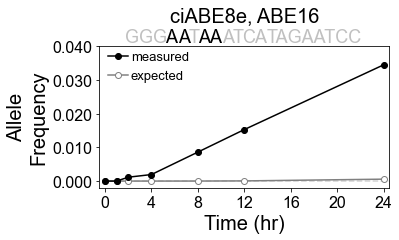

In [17]:
# allele 2: GGGGGTGGATCATAGAATCC
fig,ax = plt.subplots(figsize=(5.2,2.6))

time = [0,1,2,4,8,12,24]

ax.axhline(0,-0.5,24.5,color='lightgrey',linestyle='--')

ax.errorbar(time,df_allele2['probability'],yerr=df_allele2_err['probability'],
            fmt='-o',mfc='white',color='grey',label='calculated')
ax.errorbar(time,df_a.loc['GGGGGTGGATCATAGAATCC'],yerr=df_a_err.loc['GGGGGTGGATCATAGAATCC'],
            marker='o',color='black',label='measured')

ax.set_xlim([-0.5,24.5])
ax.set_xticks([0,4,8,12,16,20,24])
ax.tick_params(axis="x", labelsize=16)
ax.set_xlabel('Time (hr)', fontsize=20)

ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.set_ylim([-0.002,0.04])
ax.set_yticks([0,0.01,0.02,0.03,0.04])
ax.tick_params(axis="y", labelsize=16)
ax.set_ylabel('Allele\nFrequency',fontsize=20)

legend_elements = [Line2D([0],[0],marker='o',color='black',label='measured',
                          markerfacecolor='black',markersize=6,linestyle='-'),
                   Line2D([0],[0],marker='o',color='grey',label='expected',
                          markerfacecolor='white',markersize=6,linestyle='-')]
ax.legend(handles=legend_elements,bbox_to_anchor=(0.35,1.05),
          fontsize=13,frameon=False,handlelength=1.6,handletextpad=0.2)

ax.text(3.5, 0.04, 'GGG', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(5.7, 0.04, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(6.8, 0.04, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(7.7, 0.04, 'T', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(8.5, 0.04, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(9.5, 0.04, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(10.6, 0.04, 'A', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(12, 0.04, 'TC', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(13.4, 0.04, 'A', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(18, 0.04, 'TAGAATCC', ha='center', va='bottom',color='silver',fontsize=18)

ax.set_title('ciABE8e, ABE16',fontsize=20,pad=25)

plt.savefig('ExportedPlots/ABE8e_ABE16_allele2_20220405.svg',dpi=300,bbox_inches='tight')

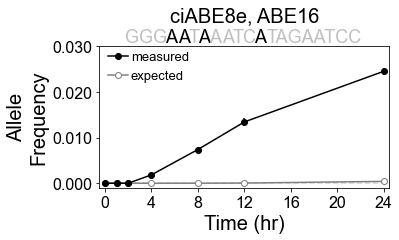

In [18]:
# allele 3: GGGGGTGAATCGTAGAATCC
fig,ax = plt.subplots(figsize=(5.2,2.6))

time = [0,1,2,4,8,12,24]

ax.axhline(0,-0.5,24.5,color='lightgrey',linestyle='--')

ax.errorbar(time,df_allele3['probability'],yerr=df_allele3_err['probability'],
            fmt='-o',mfc='white',color='grey',label='calculated')
ax.errorbar(time,df_a.loc['GGGGGTGAATCGTAGAATCC'],yerr=df_a_err.loc['GGGGGTGAATCGTAGAATCC'],
            marker='o',color='black',label='measured')

ax.set_xlim([-0.5,24.5])
ax.set_xticks([0,4,8,12,16,20,24])
ax.tick_params(axis="x", labelsize=16)
ax.set_xlabel('Time (hr)', fontsize=20)

ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.set_ylim([-0.001,0.03])
ax.set_yticks([0,0.01,0.02,0.03])
ax.tick_params(axis="y", labelsize=16)
ax.set_ylabel('Allele\nFrequency',fontsize=20)

legend_elements = [Line2D([0],[0],marker='o',color='black',label='measured',
                          markerfacecolor='black',markersize=6,linestyle='-'),
                   Line2D([0],[0],marker='o',color='grey',label='expected',
                          markerfacecolor='white',markersize=6,linestyle='-')]
ax.legend(handles=legend_elements,bbox_to_anchor=(0.35,1.05),
          fontsize=13,frameon=False,handlelength=1.6,handletextpad=0.2)

ax.text(3.5, 0.03, 'GGG', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(5.7, 0.03, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(6.8, 0.03, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(7.7, 0.03, 'T', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(8.5, 0.03, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(9.5, 0.03, 'A', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(10.6, 0.03, 'A', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(12, 0.03, 'TC', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(13.4, 0.03, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(18, 0.03, 'TAGAATCC', ha='center', va='bottom',color='silver',fontsize=18)

ax.set_title('ciABE8e, ABE16',fontsize=20,pad=25)

plt.savefig('ExportedPlots/ABE8e_ABE16_allele3_20220405.svg',dpi=300,bbox_inches='tight')

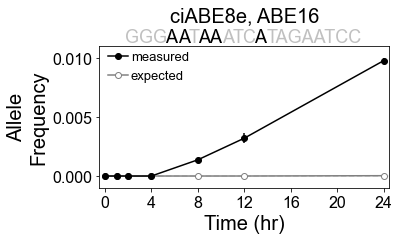

In [19]:
# allele 4: GGGGGTGGATCGTAGAATCC
fig,ax = plt.subplots(figsize=(5.2,2.6))

time = [0,1,2,4,8,12,24]

ax.axhline(0,-0.5,24.5,color='lightgrey',linestyle='--')

ax.errorbar(time,df_allele4['probability'],yerr=df_allele4_err['probability'],
            fmt='-o',mfc='white',color='grey',label='calculated')
ax.errorbar(time,df_a.loc['GGGGGTGGATCGTAGAATCC'],yerr=df_a_err.loc['GGGGGTGGATCGTAGAATCC'],
            marker='o',color='black',label='measured')

ax.set_xlim([-0.5,24.5])
ax.set_xticks([0,4,8,12,16,20,24])
ax.tick_params(axis="x", labelsize=16)
ax.set_xlabel('Time (hr)', fontsize=20)

ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.set_ylim([-0.001,0.011])
ax.set_yticks([0,0.005,0.01])
ax.tick_params(axis="y", labelsize=16)
ax.set_ylabel('Allele\nFrequency',fontsize=20)

legend_elements = [Line2D([0],[0],marker='o',color='black',label='measured',
                          markerfacecolor='black',markersize=6,linestyle='-'),
                   Line2D([0],[0],marker='o',color='grey',label='expected',
                          markerfacecolor='white',markersize=6,linestyle='-')]
ax.legend(handles=legend_elements,bbox_to_anchor=(0.35,1.05),
          fontsize=13,frameon=False,handlelength=1.6,handletextpad=0.2)

ax.text(3.5, 0.011, 'GGG', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(5.7, 0.011, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(6.8, 0.011, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(7.7, 0.011, 'T', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(8.5, 0.011, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(9.5, 0.011, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(10.6, 0.011, 'A', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(12, 0.011, 'TC', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(13.4, 0.011, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(18, 0.011, 'TAGAATCC', ha='center', va='bottom',color='silver',fontsize=18)

ax.set_title('ciABE8e, ABE16',fontsize=20,pad=25)

plt.savefig('ExportedPlots/ABE8e_ABE16_allele4_20220405.svg',dpi=300,bbox_inches='tight')

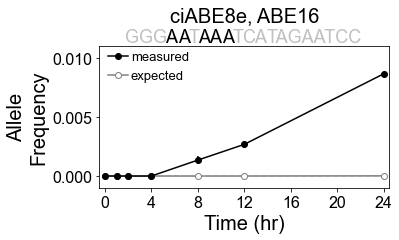

In [20]:
# allele 5: GGGGGTGGGTCATAGAATCC
fig,ax = plt.subplots(figsize=(5.2,2.6))

time = [0,1,2,4,8,12,24]

ax.axhline(0,-0.5,24.5,color='lightgrey',linestyle='--')

ax.errorbar(time,df_allele5['probability'],yerr=df_allele5_err['probability'],
            fmt='-o',mfc='white',color='grey',label='calculated')
ax.errorbar(time,df_a.loc['GGGGGTGGGTCATAGAATCC'],yerr=df_a_err.loc['GGGGGTGGGTCATAGAATCC'],
            marker='o',color='black',label='measured')

ax.set_xlim([-0.5,24.5])
ax.set_xticks([0,4,8,12,16,20,24])
ax.tick_params(axis="x", labelsize=16)
ax.set_xlabel('Time (hr)', fontsize=20)

ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.set_ylim([-0.001,0.011])
ax.set_yticks([0,0.005,0.01])
ax.tick_params(axis="y", labelsize=16)
ax.set_ylabel('Allele\nFrequency',fontsize=20)

legend_elements = [Line2D([0],[0],marker='o',color='black',label='measured',
                          markerfacecolor='black',markersize=6,linestyle='-'),
                   Line2D([0],[0],marker='o',color='grey',label='expected',
                          markerfacecolor='white',markersize=6,linestyle='-')]
ax.legend(handles=legend_elements,bbox_to_anchor=(0.35,1.05),
          fontsize=13,frameon=False,handlelength=1.6,handletextpad=0.2)

ax.text(3.5, 0.011, 'GGG', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(5.7, 0.011, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(6.8, 0.011, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(7.7, 0.011, 'T', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(8.5, 0.011, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(9.5, 0.011, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(10.6, 0.011, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(12, 0.011, 'TC', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(13.4, 0.011, 'A', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(18, 0.011, 'TAGAATCC', ha='center', va='bottom',color='silver',fontsize=18)

ax.set_title('ciABE8e, ABE16',fontsize=20,pad=25)

plt.savefig('ExportedPlots/ABE8e_ABE16_allele5_20220405.svg',dpi=300,bbox_inches='tight')

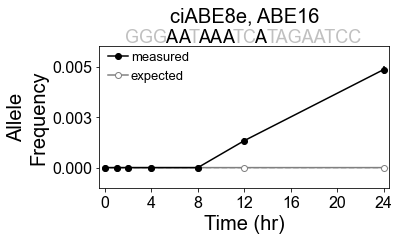

In [21]:
# allele 6: GGGGGTGGGTCGTAGAATCC
fig,ax = plt.subplots(figsize=(5.2,2.6))

time = [0,1,2,4,8,12,24]

ax.axhline(0,-0.5,24.5,color='lightgrey',linestyle='--')

ax.errorbar(time,df_allele6['probability'],yerr=df_allele6_err['probability'],
            fmt='-o',mfc='white',color='grey',label='calculated')
ax.errorbar(time,df_a.loc['GGGGGTGGGTCGTAGAATCC'],yerr=df_a_err.loc['GGGGGTGGGTCGTAGAATCC'],
            marker='o',color='black',label='measured')

ax.set_xlim([-0.5,24.5])
ax.set_xticks([0,4,8,12,16,20,24])
ax.tick_params(axis="x", labelsize=16)
ax.set_xlabel('Time (hr)', fontsize=20)

ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.set_ylim([-0.001,0.006])
ax.set_yticks([0,0.0025,0.005])
ax.tick_params(axis="y", labelsize=16)
ax.set_ylabel('Allele\nFrequency',fontsize=20)

legend_elements = [Line2D([0],[0],marker='o',color='black',label='measured',
                          markerfacecolor='black',markersize=6,linestyle='-'),
                   Line2D([0],[0],marker='o',color='grey',label='expected',
                          markerfacecolor='white',markersize=6,linestyle='-')]
ax.legend(handles=legend_elements,bbox_to_anchor=(0.35,1.05),
          fontsize=13,frameon=False,handlelength=1.6,handletextpad=0.2)

ax.text(3.5, 0.006, 'GGG', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(5.7, 0.006, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(6.8, 0.006, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(7.7, 0.006, 'T', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(8.5, 0.006, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(9.5, 0.006, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(10.6, 0.006, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(12, 0.006, 'TC', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(13.4, 0.006, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(18, 0.006, 'TAGAATCC', ha='center', va='bottom',color='silver',fontsize=18)

ax.set_title('ciABE8e, ABE16',fontsize=20,pad=25)

plt.savefig('ExportedPlots/ABE8e_ABE16_allele6_20220405.svg',dpi=300,bbox_inches='tight')

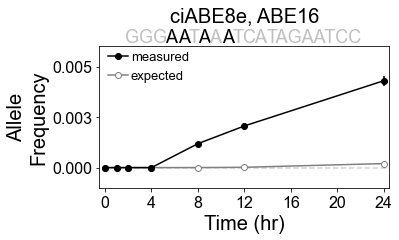

In [22]:
# allele 7: GGGGGTGAGTCATAGAATCC
fig,ax = plt.subplots(figsize=(5.2,2.6))

time = [0,1,2,4,8,12,24]

ax.axhline(0,-0.5,24.5,color='lightgrey',linestyle='--')

ax.errorbar(time,df_allele7['probability'],yerr=df_allele7_err['probability'],
            fmt='-o',mfc='white',color='grey',label='calculated')
ax.errorbar(time,df_a.loc['GGGGGTGAGTCATAGAATCC'],yerr=df_a_err.loc['GGGGGTGAGTCATAGAATCC'],
            marker='o',color='black',label='measured')

ax.set_xlim([-0.5,24.5])
ax.set_xticks([0,4,8,12,16,20,24])
ax.tick_params(axis="x", labelsize=16)
ax.set_xlabel('Time (hr)', fontsize=20)

ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.set_ylim([-0.001,0.006])
ax.set_yticks([0,0.0025,0.005])
ax.tick_params(axis="y", labelsize=16)
ax.set_ylabel('Allele\nFrequency',fontsize=20)

legend_elements = [Line2D([0],[0],marker='o',color='black',label='measured',
                          markerfacecolor='black',markersize=6,linestyle='-'),
                   Line2D([0],[0],marker='o',color='grey',label='expected',
                          markerfacecolor='white',markersize=6,linestyle='-')]
ax.legend(handles=legend_elements,bbox_to_anchor=(0.35,1.05),
          fontsize=13,frameon=False,handlelength=1.6,handletextpad=0.2)

ax.text(3.5, 0.006, 'GGG', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(5.7, 0.006, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(6.8, 0.006, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(7.7, 0.006, 'T', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(8.5, 0.006, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(9.5, 0.006, 'A', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(10.6, 0.006, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(12, 0.006, 'TC', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(13.4, 0.006, 'A', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(18, 0.006, 'TAGAATCC', ha='center', va='bottom',color='silver',fontsize=18)

ax.set_title('ciABE8e, ABE16',fontsize=20,pad=25)

plt.savefig('ExportedPlots/ABE8e_ABE16_allele7_20220405.svg',dpi=300,bbox_inches='tight')

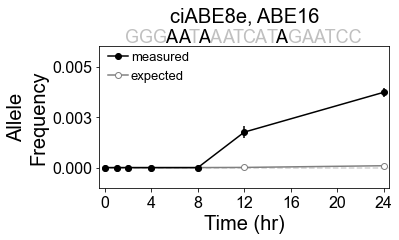

In [23]:
# allele 8: GGGGGTGAATCATGGAATCC
fig,ax = plt.subplots(figsize=(5.2,2.6))

time = [0,1,2,4,8,12,24]

ax.axhline(0,-0.5,24.5,color='lightgrey',linestyle='--')

ax.errorbar(time,df_allele8['probability'],yerr=df_allele8_err['probability'],
            fmt='-o',mfc='white',color='grey',label='calculated')
ax.errorbar(time,df_a.loc['GGGGGTGAATCATGGAATCC'],yerr=df_a_err.loc['GGGGGTGAATCATGGAATCC'],
            marker='o',color='black',label='measured')

ax.set_xlim([-0.5,24.5])
ax.set_xticks([0,4,8,12,16,20,24])
ax.tick_params(axis="x", labelsize=16)
ax.set_xlabel('Time (hr)', fontsize=20)

ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.set_ylim([-0.001,0.006])
ax.set_yticks([0,0.0025,0.005])
ax.tick_params(axis="y", labelsize=16)
ax.set_ylabel('Allele\nFrequency',fontsize=20)

legend_elements = [Line2D([0],[0],marker='o',color='black',label='measured',
                          markerfacecolor='black',markersize=6,linestyle='-'),
                   Line2D([0],[0],marker='o',color='grey',label='expected',
                          markerfacecolor='white',markersize=6,linestyle='-')]
ax.legend(handles=legend_elements,bbox_to_anchor=(0.35,1.05),
          fontsize=13,frameon=False,handlelength=1.6,handletextpad=0.2)

ax.text(3.5, 0.006, 'GGG', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(5.7, 0.006, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(6.8, 0.006, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(7.7, 0.006, 'T', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(8.5, 0.006, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(9.5, 0.006, 'A', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(10.6, 0.006, 'A', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(12, 0.006, 'TC', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(13.4, 0.006, 'A', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(14.4, 0.006, 'T', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(15.2, 0.006, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(18.9, 0.006, 'GAATCC', ha='center', va='bottom',color='silver',fontsize=18)

ax.set_title('ciABE8e, ABE16',fontsize=20,pad=25)

plt.savefig('ExportedPlots/ABE8e_ABE16_allele8_20220405.svg',dpi=300,bbox_inches='tight')

# HEK2

In [24]:
df_c = pd.read_csv('Data/cumulative/ABE8e_HEK2_A115.csv')
df_c = df_c / 100

df_c_sem = pd.read_csv('Data/cumulative/ABE8e_HEK2_A115_sem.csv')
df_c_sem = df_c_sem / 100

In [25]:
df_allele1 = df_c[['A5','A7']]
df_allele1['probability'] = df_allele1['A5'] * df_allele1['A7']
df_allele1.to_csv('Data/calc_freq/ABE8e_HEK2_A5_A7.csv',index=False)

df_allele1_err = df_c_sem[['A5','A7']]
df_allele1_err['probability'] = np.sqrt(np.square(df_allele1_err['A5']/df_allele1['A5']) +
                                        np.square(df_allele1_err['A7']/df_allele1['A7'])) * df_allele1['probability']
df_allele1_err.to_csv('Data/calc_freq/ABE8e_HEK2_A5_A7_err.csv',index=False)

/var/folders/zt/rj0vk4w576n5lb6vjzgpk8nc0000gn/T/ipykernel_15777/1880360956.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele1['probability'] = df_allele1['A5'] * df_allele1['A7']
/var/folders/zt/rj0vk4w576n5lb6vjzgpk8nc0000gn/T/ipykernel_15777/1880360956.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele1_err['probability'] = np.sqrt(np.square(df_allele1_err['A5']/df_allele1['A5']) +


In [26]:
df_allele2 = df_c[['A3','A5','A7']]
df_allele2['probability'] = df_allele2['A3']*df_allele2['A5']*df_allele2['A7']
df_allele2.to_csv('Data/calc_freq/ABE8e_HEK2_A3_A5_A7.csv',index=False)

df_allele2_err = df_c_sem[['A3','A5','A7']]
df_allele2_err['probability'] = np.sqrt(np.square(df_allele2_err['A3']/df_allele2['A3']) +
                                        np.square(df_allele2_err['A5']/df_allele2['A5']) +
                                        np.square(df_allele2_err['A7']/df_allele2['A7'])) * df_allele2['probability']
df_allele2_err.to_csv('Data/calc_freq/ABE8e_HEK2_A3_A5_A7_err.csv',index=False)

/var/folders/zt/rj0vk4w576n5lb6vjzgpk8nc0000gn/T/ipykernel_15777/3415083836.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele2['probability'] = df_allele2['A3']*df_allele2['A5']*df_allele2['A7']
/var/folders/zt/rj0vk4w576n5lb6vjzgpk8nc0000gn/T/ipykernel_15777/3415083836.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele2_err['probability'] = np.sqrt(np.square(df_allele2_err['A3']/df_allele2['A3']) +


In [27]:
df_allele3 = df_c[['A5','A7','A8']]
df_allele3['probability'] = df_allele3['A5']*df_allele3['A7']*df_allele3['A8']
df_allele3.to_csv('Data/calc_freq/ABE8e_HEK2_A5_A7_A8.csv',index=False)

df_allele3_err = df_c_sem[['A5','A7','A8']]
df_allele3_err['probability'] = np.sqrt(np.square(df_allele3_err['A5']/df_allele3['A5']) +
                                        np.square(df_allele3_err['A7']/df_allele3['A7']) +
                                        np.square(df_allele3_err['A8']/df_allele3['A8'])) * df_allele3['probability']
df_allele3_err.to_csv('Data/calc_freq/ABE8e_HEK2_A5_A7_A8_err.csv',index=False)

/var/folders/zt/rj0vk4w576n5lb6vjzgpk8nc0000gn/T/ipykernel_15777/3538545945.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele3['probability'] = df_allele3['A5']*df_allele3['A7']*df_allele3['A8']
/var/folders/zt/rj0vk4w576n5lb6vjzgpk8nc0000gn/T/ipykernel_15777/3538545945.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele3_err['probability'] = np.sqrt(np.square(df_allele3_err['A5']/df_allele3['A5']) +


In [28]:
df_allele4 = df_c[['A5','A7','A12']]
df_allele4['probability'] = df_allele4['A5']*df_allele4['A7']*df_allele4['A12']
df_allele4.to_csv('Data/calc_freq/ABE8e_HEK2_A5_A7_A12.csv',index=False)

df_allele4_err = df_c_sem[['A5','A7','A12']]
df_allele4_err['probability'] = np.sqrt(np.square(df_allele4_err['A5']/df_allele4['A5']) +
                                        np.square(df_allele4_err['A7']/df_allele4['A7']) +
                                        np.square(df_allele4_err['A12']/df_allele4['A12'])) * df_allele4['probability']
df_allele4_err.to_csv('Data/calc_freq/ABE8e_HEK2_A5_A7_A12_err.csv',index=False)

/var/folders/zt/rj0vk4w576n5lb6vjzgpk8nc0000gn/T/ipykernel_15777/1523746905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele4['probability'] = df_allele4['A5']*df_allele4['A7']*df_allele4['A12']
/var/folders/zt/rj0vk4w576n5lb6vjzgpk8nc0000gn/T/ipykernel_15777/1523746905.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele4_err['probability'] = np.sqrt(np.square(df_allele4_err['A5']/df_allele4['A5']) +


In [29]:
df_allele5 = df_c[['A5','A7','A9']]
df_allele5['probability'] = df_allele5['A5']*df_allele5['A7']*df_allele5['A9']
df_allele5.to_csv('Data/calc_freq/ABE8e_HEK2_A5_A7_A9.csv',index=False)

df_allele5_err = df_c_sem[['A5','A7','A9']]
df_allele5_err['probability'] = np.sqrt(np.square(df_allele5_err['A5']/df_allele5['A5']) +
                                        np.square(df_allele5_err['A7']/df_allele5['A7']) +
                                        np.square(df_allele5_err['A9']/df_allele5['A9'])) * df_allele4['probability']
df_allele5_err.to_csv('Data/calc_freq/ABE8e_HEK2_A5_A7_A9_err.csv',index=False)

/var/folders/zt/rj0vk4w576n5lb6vjzgpk8nc0000gn/T/ipykernel_15777/3951877923.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele5['probability'] = df_allele5['A5']*df_allele5['A7']*df_allele5['A9']
/var/folders/zt/rj0vk4w576n5lb6vjzgpk8nc0000gn/T/ipykernel_15777/3951877923.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele5_err['probability'] = np.sqrt(np.square(df_allele5_err['A5']/df_allele5['A5']) +


In [30]:
df_allele6 = df_c[['A3','A5','A7','A8']]
df_allele6['probability'] = df_allele6['A3']*df_allele6['A5']*df_allele6['A7']*df_allele6['A8']
df_allele6.to_csv('Data/calc_freq/ABE8e_HEK2_A3_A5_A7_A8.csv',index=False)

df_allele6_err = df_c_sem[['A3','A5','A7','A8']]
df_allele6_err['probability'] = np.sqrt(np.square(df_allele6_err['A3']/df_allele6['A3']) +
                                        np.square(df_allele6_err['A5']/df_allele6['A5']) +
                                        np.square(df_allele6_err['A7']/df_allele6['A7']) +
                                        np.square(df_allele6_err['A8']/df_allele6['A8'])) * df_allele4['probability']
df_allele6_err.to_csv('Data/calc_freq/ABE8e_HEK2_A3_A5_A7_A8_err.csv',index=False)

/var/folders/zt/rj0vk4w576n5lb6vjzgpk8nc0000gn/T/ipykernel_15777/2076968157.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele6['probability'] = df_allele6['A3']*df_allele6['A5']*df_allele6['A7']*df_allele6['A8']
/var/folders/zt/rj0vk4w576n5lb6vjzgpk8nc0000gn/T/ipykernel_15777/2076968157.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele6_err['probability'] = np.sqrt(np.square(df_allele6_err['A3']/df_allele6['A3']) +


In [31]:
df_a = pd.read_csv('Data/allele_merged/20211109_ABE8e_HEK2_A115.csv',
                   usecols=['target','24h_mean','12h_mean','8h_mean','4h_mean',
                            '2h_mean','1h_mean','0h_mean'])

df_a = df_a.set_index('target')
df_a = df_a.fillna(0)
df_a = df_a[df_a.columns[::-1]]
df_a = df_a / 100

df_a.head()

,0h_mean,1h_mean,2h_mean,4h_mean,8h_mean,12h_mean,24h_mean
target,,,,,,,
GAACACAAAGCATAGACTGC,0.921855,0.915732,0.901101,0.879812,0.830665,0.798343,0.723831
GAACGCGAAGCATAGACTGC,0.007217,0.009648,0.011659,0.031091,0.069552,0.089121,0.123289
GAGCGCGAAGCATAGACTGC,0.000000,0.000000,0.001139,0.001866,0.004804,0.008961,0.017879
GAACGCGGAGCATAGACTGC,0.000000,0.000000,0.000000,0.001494,0.004553,0.007731,0.014700
GAACGCAAAGCATAGACTGC,0.005173,0.010295,0.014083,0.014545,0.012845,0.010839,0.009917


In [32]:
df_a_err = pd.read_csv('Data/allele_merged/20211109_ABE8e_HEK2_A115.csv',
                       usecols=['target','24h_SEM','12h_SEM','8h_SEM','4h_SEM',
                                '2h_SEM','1h_SEM','0h_SEM'])

df_a_err = df_a_err.set_index('target')
df_a_err = df_a_err.fillna(0)
df_a_err = df_a_err[df_a_err.columns[::-1]]
df_a_err = df_a_err / 100

df_a_err.head()

,0h_SEM,1h_SEM,2h_SEM,4h_SEM,8h_SEM,12h_SEM,24h_SEM
target,,,,,,,
GAACACAAAGCATAGACTGC,0.000904,0.000844,0.003853,0.001256,0.005625,0.000122,0.003015
GAACGCGAAGCATAGACTGC,0.000867,0.000692,0.001194,0.001506,0.004353,0.000799,0.003751
GAGCGCGAAGCATAGACTGC,0.000000,0.000000,0.000127,0.000297,0.000272,0.000165,0.000407
GAACGCGGAGCATAGACTGC,0.000000,0.000000,0.000000,0.000240,0.000586,0.000152,0.000625
GAACGCAAAGCATAGACTGC,0.000118,0.000589,0.000442,0.000266,0.000805,0.000261,0.000187


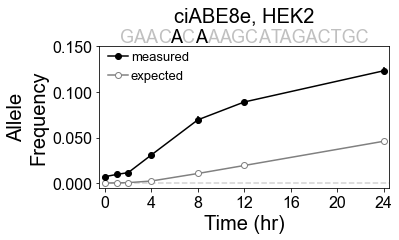

In [33]:
# allele 1: GAACGCGAAGCATAGACTGC
fig,ax = plt.subplots(figsize=(5.2,2.6))

time = [0,1,2,4,8,12,24]

ax.axhline(0,-0.5,24.5,color='lightgrey',linestyle='--')

ax.errorbar(time,df_allele1['probability'],yerr=df_allele1_err['probability'],
            fmt='-o',mfc='white',color='grey',label='calculated')
ax.errorbar(time,df_a.loc['GAACGCGAAGCATAGACTGC'],yerr=df_a_err.loc['GAACGCGAAGCATAGACTGC'],
            marker='o',color='black',label='measured')

ax.set_xlim([-0.5,24.5])
ax.set_xticks([0,4,8,12,16,20,24])
ax.tick_params(axis="x", labelsize=16)
ax.set_xlabel('Time (hr)', fontsize=20)

ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.set_ylim([-0.005,0.15])
ax.set_yticks([0,0.05,0.1,0.15])
ax.tick_params(axis="y", labelsize=16)
ax.set_ylabel('Allele\nFrequency',fontsize=20)

legend_elements = [Line2D([0],[0],marker='o',color='black',label='measured',
                          markerfacecolor='black',markersize=6,linestyle='-'),
                   Line2D([0],[0],marker='o',color='grey',label='expected',
                          markerfacecolor='white',markersize=6,linestyle='-')]
ax.legend(handles=legend_elements,bbox_to_anchor=(0.35,1.05),
          fontsize=13,frameon=False,handlelength=1.6,handletextpad=0.2)

ax.text(2.4, 0.15, 'GA', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(4, 0.15, 'A', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(5.1, 0.15, 'C', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(6.1, 0.15, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(7.1, 0.15, 'C', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(8.3, 0.15, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(9.3, 0.15, 'A', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(10.3, 0.15, 'A', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(12, 0.15, 'GC', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(13.7, 0.15, 'A', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(18.5, 0.15, 'TAGACTGC', ha='center', va='bottom',color='silver',fontsize=18)
#ax.text(12, 0.15, 'GAACACAAAGCATAGACTGC', ha='center', va='bottom',color='silver',fontsize=18)

ax.set_title('ciABE8e, HEK2',fontsize=20,pad=25)

plt.savefig('ExportedPlots/ABE8e_HEK2_allele1_20220405.svg',dpi=300,bbox_inches='tight')

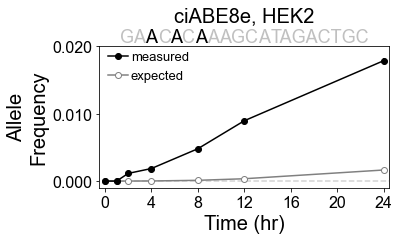

In [34]:
# allele 2: GAGCGCGAAGCATAGACTGC
fig,ax = plt.subplots(figsize=(5.2,2.6))

time = [0,1,2,4,8,12,24]

ax.axhline(0,-0.5,24.5,color='lightgrey',linestyle='--')

ax.errorbar(time,df_allele2['probability'],yerr=df_allele2_err['probability'],
            fmt='-o',mfc='white',color='grey',label='calculated')
ax.errorbar(time,df_a.loc['GAGCGCGAAGCATAGACTGC'],yerr=df_a_err.loc['GAGCGCGAAGCATAGACTGC'],
            marker='o',color='black',label='measured')

ax.set_xlim([-0.5,24.5])
ax.set_xticks([0,4,8,12,16,20,24])
ax.tick_params(axis="x", labelsize=16)
ax.set_xlabel('Time (hr)', fontsize=20)

ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.set_ylim([-0.001,0.02])
ax.set_yticks([0,0.01,0.02])
ax.tick_params(axis="y", labelsize=16)
ax.set_ylabel('Allele\nFrequency',fontsize=20)

legend_elements = [Line2D([0],[0],marker='o',color='black',label='measured',
                          markerfacecolor='black',markersize=6,linestyle='-'),
                   Line2D([0],[0],marker='o',color='grey',label='expected',
                          markerfacecolor='white',markersize=6,linestyle='-')]
ax.legend(handles=legend_elements,bbox_to_anchor=(0.35,1.05),
          fontsize=13,frameon=False,handlelength=1.6,handletextpad=0.2)

ax.text(2.4, 0.02, 'GA', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(4, 0.02, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(5.1, 0.02, 'C', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(6.1, 0.02, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(7.1, 0.02, 'C', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(8.3, 0.02, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(9.3, 0.02, 'A', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(10.3, 0.02, 'A', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(12, 0.02, 'GC', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(13.7, 0.02, 'A', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(18.5, 0.02, 'TAGACTGC', ha='center', va='bottom',color='silver',fontsize=18)
#ax.text(12, 0.15, 'GAACACAAAGCATAGACTGC', ha='center', va='bottom',color='silver',fontsize=18)

ax.set_title('ciABE8e, HEK2',fontsize=20,pad=25)

plt.savefig('ExportedPlots/ABE8e_HEK2_allele2_20220405.svg',dpi=300,bbox_inches='tight')

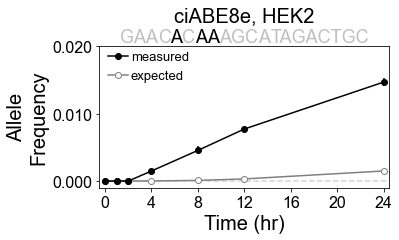

In [35]:
# allele 3: GAACGCGGAGCATAGACTGC
fig,ax = plt.subplots(figsize=(5.2,2.6))

time = [0,1,2,4,8,12,24]

ax.axhline(0,-0.5,24.5,color='lightgrey',linestyle='--')

ax.errorbar(time,df_allele3['probability'],yerr=df_allele3_err['probability'],
            fmt='-o',mfc='white',color='grey',label='calculated')
ax.errorbar(time,df_a.loc['GAACGCGGAGCATAGACTGC'],yerr=df_a_err.loc['GAACGCGGAGCATAGACTGC'],
            marker='o',color='black',label='measured')

ax.set_xlim([-0.5,24.5])
ax.set_xticks([0,4,8,12,16,20,24])
ax.tick_params(axis="x", labelsize=16)
ax.set_xlabel('Time (hr)', fontsize=20)

ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.set_ylim([-0.001,0.02])
ax.set_yticks([0,0.01,0.02])
ax.tick_params(axis="y", labelsize=16)
ax.set_ylabel('Allele\nFrequency',fontsize=20)

legend_elements = [Line2D([0],[0],marker='o',color='black',label='measured',
                          markerfacecolor='black',markersize=6,linestyle='-'),
                   Line2D([0],[0],marker='o',color='grey',label='expected',
                          markerfacecolor='white',markersize=6,linestyle='-')]
ax.legend(handles=legend_elements,bbox_to_anchor=(0.35,1.05),
          fontsize=13,frameon=False,handlelength=1.6,handletextpad=0.2)

ax.text(2.4, 0.02, 'GA', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(4, 0.02, 'A', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(5.1, 0.02, 'C', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(6.1, 0.02, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(7.1, 0.02, 'C', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(8.3, 0.02, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(9.3, 0.02, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(10.3, 0.02, 'A', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(12, 0.02, 'GC', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(13.7, 0.02, 'A', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(18.5, 0.02, 'TAGACTGC', ha='center', va='bottom',color='silver',fontsize=18)
#ax.text(12, 0.15, 'GAACACAAAGCATAGACTGC', ha='center', va='bottom',color='silver',fontsize=18)

ax.set_title('ciABE8e, HEK2',fontsize=20,pad=25)

plt.savefig('ExportedPlots/ABE8e_HEK2_allele3_20220405.svg',dpi=300,bbox_inches='tight')

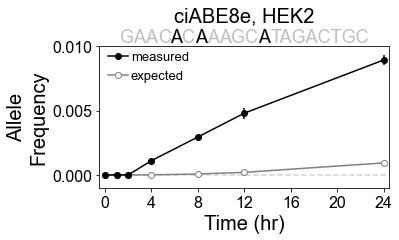

In [36]:
# allele 4: GAACGCGAAGCGTAGACTGC
fig,ax = plt.subplots(figsize=(5.2,2.6))

time = [0,1,2,4,8,12,24]

ax.axhline(0,-0.5,24.5,color='lightgrey',linestyle='--')

ax.errorbar(time,df_allele4['probability'],yerr=df_allele4_err['probability'],
            fmt='-o',mfc='white',color='grey',label='calculated')
ax.errorbar(time,df_a.loc['GAACGCGAAGCGTAGACTGC'],yerr=df_a_err.loc['GAACGCGAAGCGTAGACTGC'],
            marker='o',color='black',label='measured')

ax.set_xlim([-0.5,24.5])
ax.set_xticks([0,4,8,12,16,20,24])
ax.tick_params(axis="x", labelsize=16)
ax.set_xlabel('Time (hr)', fontsize=20)

ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.set_ylim([-0.001,0.01])
ax.set_yticks([0,0.005,0.01])
ax.tick_params(axis="y", labelsize=16)
ax.set_ylabel('Allele\nFrequency',fontsize=20)

legend_elements = [Line2D([0],[0],marker='o',color='black',label='measured',
                          markerfacecolor='black',markersize=6,linestyle='-'),
                   Line2D([0],[0],marker='o',color='grey',label='expected',
                          markerfacecolor='white',markersize=6,linestyle='-')]
ax.legend(handles=legend_elements,bbox_to_anchor=(0.35,1.05),
          fontsize=13,frameon=False,handlelength=1.6,handletextpad=0.2)

ax.text(2.4, 0.01, 'GA', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(4, 0.01, 'A', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(5.1, 0.01, 'C', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(6.1, 0.01, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(7.1, 0.01, 'C', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(8.3, 0.01, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(9.3, 0.01, 'A', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(10.3, 0.01, 'A', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(12, 0.01, 'GC', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(13.7, 0.01, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(18.5, 0.01, 'TAGACTGC', ha='center', va='bottom',color='silver',fontsize=18)
#ax.text(12, 0.15, 'GAACACAAAGCATAGACTGC', ha='center', va='bottom',color='silver',fontsize=18)

ax.set_title('ciABE8e, HEK2',fontsize=20,pad=25)

plt.savefig('ExportedPlots/ABE8e_HEK2_allele4_20220405.svg',dpi=300,bbox_inches='tight')

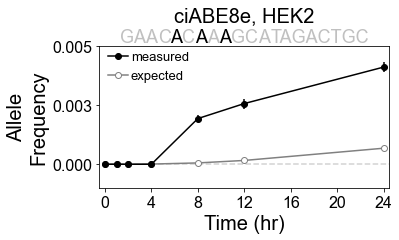

In [37]:
# allele 5: GAACGCGAGGCATAGACTGC
fig,ax = plt.subplots(figsize=(5.2,2.6))

time = [0,1,2,4,8,12,24]

ax.axhline(0,-0.5,24.5,color='lightgrey',linestyle='--')

ax.errorbar(time,df_allele5['probability'],yerr=df_allele5_err['probability'],
            fmt='-o',mfc='white',color='grey',label='calculated')
ax.errorbar(time,df_a.loc['GAACGCGAGGCATAGACTGC'],yerr=df_a_err.loc['GAACGCGAGGCATAGACTGC'],
            marker='o',color='black',label='measured')

ax.set_xlim([-0.5,24.5])
ax.set_xticks([0,4,8,12,16,20,24])
ax.tick_params(axis="x", labelsize=16)
ax.set_xlabel('Time (hr)', fontsize=20)

ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.set_ylim([-0.001,0.005])
ax.set_yticks([0,0.0025,0.005])
ax.tick_params(axis="y", labelsize=16)
ax.set_ylabel('Allele\nFrequency',fontsize=20)

legend_elements = [Line2D([0],[0],marker='o',color='black',label='measured',
                          markerfacecolor='black',markersize=6,linestyle='-'),
                   Line2D([0],[0],marker='o',color='grey',label='expected',
                          markerfacecolor='white',markersize=6,linestyle='-')]
ax.legend(handles=legend_elements,bbox_to_anchor=(0.35,1.05),
          fontsize=13,frameon=False,handlelength=1.6,handletextpad=0.2)

ax.text(2.4, 0.005, 'GA', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(4, 0.005, 'A', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(5.1, 0.005, 'C', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(6.1, 0.005, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(7.1, 0.005, 'C', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(8.3, 0.005, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(9.3, 0.005, 'A', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(10.3, 0.005, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(12, 0.005, 'GC', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(13.7, 0.005, 'A', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(18.5, 0.005, 'TAGACTGC', ha='center', va='bottom',color='silver',fontsize=18)
#ax.text(12, 0.15, 'GAACACAAAGCATAGACTGC', ha='center', va='bottom',color='silver',fontsize=18)

ax.set_title('ciABE8e, HEK2',fontsize=20,pad=25)

plt.savefig('ExportedPlots/ABE8e_HEK2_allele5_20220405.svg',dpi=300,bbox_inches='tight')

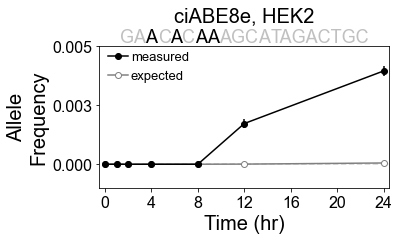

In [38]:
# allele 6: GAGCGCGGAGCATAGACTGC
fig,ax = plt.subplots(figsize=(5.2,2.6))

time = [0,1,2,4,8,12,24]

ax.axhline(0,-0.5,24.5,color='lightgrey',linestyle='--')

ax.errorbar(time,df_allele6['probability'],yerr=df_allele6_err['probability'],
            fmt='-o',mfc='white',color='grey',label='calculated')
ax.errorbar(time,df_a.loc['GAGCGCGGAGCATAGACTGC'],yerr=df_a_err.loc['GAGCGCGGAGCATAGACTGC'],
            marker='o',color='black',label='measured')

ax.set_xlim([-0.5,24.5])
ax.set_xticks([0,4,8,12,16,20,24])
ax.tick_params(axis="x", labelsize=16)
ax.set_xlabel('Time (hr)', fontsize=20)

ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.set_ylim([-0.001,0.005])
ax.set_yticks([0,0.0025,0.005])
ax.tick_params(axis="y", labelsize=16)
ax.set_ylabel('Allele\nFrequency',fontsize=20)

legend_elements = [Line2D([0],[0],marker='o',color='black',label='measured',
                          markerfacecolor='black',markersize=6,linestyle='-'),
                   Line2D([0],[0],marker='o',color='grey',label='expected',
                          markerfacecolor='white',markersize=6,linestyle='-')]
ax.legend(handles=legend_elements,bbox_to_anchor=(0.35,1.05),
          fontsize=13,frameon=False,handlelength=1.6,handletextpad=0.2)

ax.text(2.4, 0.005, 'GA', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(4, 0.005, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(5.1, 0.005, 'C', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(6.1, 0.005, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(7.1, 0.005, 'C', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(8.3, 0.005, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(9.3, 0.005, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(10.3, 0.005, 'A', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(12, 0.005, 'GC', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(13.7, 0.005, 'A', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(18.5, 0.005, 'TAGACTGC', ha='center', va='bottom',color='silver',fontsize=18)
#ax.text(12, 0.15, 'GAACACAAAGCATAGACTGC', ha='center', va='bottom',color='silver',fontsize=18)

ax.set_title('ciABE8e, HEK2',fontsize=20,pad=25)

plt.savefig('ExportedPlots/ABE8e_HEK2_allele6_20220405.svg',dpi=300,bbox_inches='tight')

# HEK3

In [39]:
df_c = pd.read_csv('Data/cumulative/ABE8e_HEK3_A115.csv')
df_c = df_c / 100

df_c_sem = pd.read_csv('Data/cumulative/ABE8e_HEK3_A115_sem.csv')
df_c_sem = df_c_sem / 100

In [40]:
df_allele1 = df_c[['A6','A8']]
df_allele1['probability'] = df_allele1['A6'] * df_allele1['A8']
df_allele1.to_csv('Data/calc_freq/ABE8e_HEK3_A6_A8.csv',index=False)

df_allele1_err = df_c_sem[['A6','A8']]
df_allele1_err['probability'] = np.sqrt(np.square(df_allele1_err['A6']/df_allele1['A6']) +
                                        np.square(df_allele1_err['A8']/df_allele1['A8'])) * df_allele1['probability']
df_allele1_err.to_csv('Data/calc_freq/ABE8e_HEK3_A6_A8_err.csv',index=False)

/var/folders/zt/rj0vk4w576n5lb6vjzgpk8nc0000gn/T/ipykernel_15777/992712992.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele1['probability'] = df_allele1['A6'] * df_allele1['A8']
/var/folders/zt/rj0vk4w576n5lb6vjzgpk8nc0000gn/T/ipykernel_15777/992712992.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele1_err['probability'] = np.sqrt(np.square(df_allele1_err['A6']/df_allele1['A6']) +


In [41]:
df_allele2 = df_c[['A6','A8','A12']]
df_allele2['probability'] = df_allele2['A6'] * df_allele2['A8'] * df_allele2['A12']
df_allele2.to_csv('Data/calc_freq/ABE8e_HEK3_A6_A8_A12.csv',index=False)

df_allele2_err = df_c_sem[['A6','A8','A12']]
df_allele2_err['probability'] = np.sqrt(np.square(df_allele2_err['A6']/df_allele2['A6']) +
                                        np.square(df_allele2_err['A8']/df_allele2['A8']) +
                                        np.square(df_allele2_err['A12']/df_allele2['A12'])) * df_allele2['probability']
df_allele2_err.to_csv('Data/calc_freq/ABE8e_HEK3_A6_A8_A12_err.csv',index=False)

/var/folders/zt/rj0vk4w576n5lb6vjzgpk8nc0000gn/T/ipykernel_15777/3005510286.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele2['probability'] = df_allele2['A6'] * df_allele2['A8'] * df_allele2['A12']
/var/folders/zt/rj0vk4w576n5lb6vjzgpk8nc0000gn/T/ipykernel_15777/3005510286.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele2_err['probability'] = np.sqrt(np.square(df_allele2_err['A6']/df_allele2['A6']) +


In [42]:
df_a = pd.read_csv('Data/allele_merged/20211109_ABE8e_HEK3_A115.csv',
                   usecols=['target','24h_mean','12h_mean','8h_mean','4h_mean',
                            '2h_mean','1h_mean','0h_mean'])

df_a = df_a.set_index('target')
df_a = df_a.fillna(0)
df_a = df_a[df_a.columns[::-1]]
df_a = df_a / 100

df_a.head()

,0h_mean,1h_mean,2h_mean,4h_mean,8h_mean,12h_mean,24h_mean
target,,,,,,,
GGCCCAGACTGAGCACGTGA,0.838860,0.818099,0.804165,0.791763,0.766234,0.756861,0.699527
GGCCCGGGCTGAGCACGTGA,0.025601,0.031821,0.032058,0.043629,0.075972,0.086982,0.149267
GGCCCGGACTGAGCACGTGA,0.063645,0.073208,0.079565,0.088142,0.073561,0.061793,0.037680
GGCCCGGGCTGGGCACGTGA,0.000000,0.000000,0.001243,0.001524,0.005511,0.007229,0.020526
GGCCCGGACTGGGCACGTGA,0.000000,0.001380,0.001779,0.002131,0.003840,0.003201,0.004859


In [43]:
df_a_err = pd.read_csv('Data/allele_merged/20211109_ABE8e_HEK3_A115.csv',
                       usecols=['target','24h_SEM','12h_SEM','8h_SEM','4h_SEM',
                                '2h_SEM','1h_SEM','0h_SEM'])

df_a_err = df_a_err.set_index('target')
df_a_err = df_a_err.fillna(0)
df_a_err = df_a_err[df_a_err.columns[::-1]]
df_a_err = df_a_err / 100

df_a_err.head()

,0h_SEM,1h_SEM,2h_SEM,4h_SEM,8h_SEM,12h_SEM,24h_SEM
target,,,,,,,
GGCCCAGACTGAGCACGTGA,0.004222,0.005453,0.013235,0.004037,0.005033,0.009833,0.004658
GGCCCGGGCTGAGCACGTGA,0.001077,0.002781,0.002558,0.001754,0.001800,0.009967,0.005614
GGCCCGGACTGAGCACGTGA,0.002378,0.000952,0.005087,0.001205,0.002150,0.001241,0.000650
GGCCCGGGCTGGGCACGTGA,0.000000,0.000000,0.000108,0.000107,0.000164,0.002030,0.000130
GGCCCGGACTGGGCACGTGA,0.000000,0.000147,0.000323,0.000624,0.000869,0.000398,0.000232


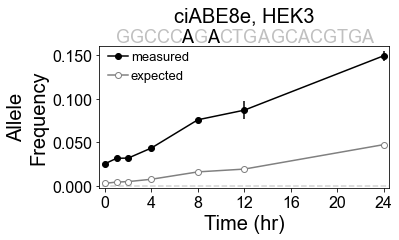

In [44]:
# allele 1: GGCCCGGGCTGAGCACGTGA
fig,ax = plt.subplots(figsize=(5.2,2.6))

time = [0,1,2,4,8,12,24]

ax.axhline(0,-0.5,24.5,color='lightgrey',linestyle='--')

ax.errorbar(time,df_allele1['probability'],yerr=df_allele1_err['probability'],
            fmt='-o',mfc='white',color='grey',label='calculated')
ax.errorbar(time,df_a.loc['GGCCCGGGCTGAGCACGTGA'],yerr=df_a_err.loc['GGCCCGGGCTGAGCACGTGA'],
            marker='o',color='black',label='measured')

ax.set_xlim([-0.5,24.5])
ax.set_xticks([0,4,8,12,16,20,24])
ax.tick_params(axis="x", labelsize=16)
ax.set_xlabel('Time (hr)', fontsize=20)

ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.set_ylim([-0.002,0.16])
ax.set_yticks([0,0.05,0.1,0.15])
ax.tick_params(axis="y", labelsize=16)
ax.set_ylabel('Allele\nFrequency',fontsize=20)

legend_elements = [Line2D([0],[0],marker='o',color='black',label='measured',
                          markerfacecolor='black',markersize=6,linestyle='-'),
                   Line2D([0],[0],marker='o',color='grey',label='expected',
                          markerfacecolor='white',markersize=6,linestyle='-')]
ax.legend(handles=legend_elements,bbox_to_anchor=(0.35,1.05),
          fontsize=13,frameon=False,handlelength=1.6,handletextpad=0.2)

ax.text(3.8, 0.16, 'GGCCC', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(7.1, 0.16, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(8.3, 0.16, 'G', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(9.35, 0.16, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(11.5, 0.16, 'CTG', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(13.65, 0.16, 'A', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(18.7, 0.16, 'GCACGTGA', ha='center', va='bottom',color='silver',fontsize=18)

ax.set_title('ciABE8e, HEK3',fontsize=20,pad=25)

plt.savefig('ExportedPlots/ABE8e_HEK3_allele1_20220405.svg',dpi=300,bbox_inches='tight')

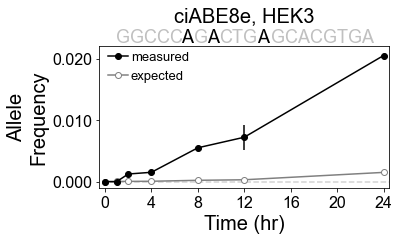

In [45]:
# allele 2: GGCCCGGGCTGGGCACGTGA
fig,ax = plt.subplots(figsize=(5.2,2.6))

time = [0,1,2,4,8,12,24]

ax.axhline(0,-0.5,24.5,color='lightgrey',linestyle='--')

ax.errorbar(time,df_allele2['probability'],yerr=df_allele2_err['probability'],
            fmt='-o',mfc='white',color='grey',label='calculated')
ax.errorbar(time,df_a.loc['GGCCCGGGCTGGGCACGTGA'],yerr=df_a_err.loc['GGCCCGGGCTGGGCACGTGA'],
            marker='o',color='black',label='measured')

ax.set_xlim([-0.5,24.5])
ax.set_xticks([0,4,8,12,16,20,24])
ax.tick_params(axis="x", labelsize=16)
ax.set_xlabel('Time (hr)', fontsize=20)

ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.set_ylim([-0.001,0.022])
#ax.set_yticks([0,0.05,0.1,0.15])
ax.tick_params(axis="y", labelsize=16)
ax.set_ylabel('Allele\nFrequency',fontsize=20)

legend_elements = [Line2D([0],[0],marker='o',color='black',label='measured',
                          markerfacecolor='black',markersize=6,linestyle='-'),
                   Line2D([0],[0],marker='o',color='grey',label='expected',
                          markerfacecolor='white',markersize=6,linestyle='-')]
ax.legend(handles=legend_elements,bbox_to_anchor=(0.35,1.05),
          fontsize=13,frameon=False,handlelength=1.6,handletextpad=0.2)

ax.text(3.8, 0.022, 'GGCCC', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(7.1, 0.022, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(8.3, 0.022, 'G', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(9.35, 0.022, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(11.5, 0.022, 'CTG', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(13.65, 0.022, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(18.7, 0.022, 'GCACGTGA', ha='center', va='bottom',color='silver',fontsize=18)

ax.set_title('ciABE8e, HEK3',fontsize=20,pad=25)

plt.savefig('ExportedPlots/ABE8e_HEK3_allele2_20220405.svg',dpi=300,bbox_inches='tight')